### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [184]:
data = pd.read_csv('data/coupons.csv')

#### Look at the head data

In [185]:
data.head(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Check for nulls

In [187]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

***The results show that Car has 12576 rows with missing data, which implies the data is mostly missing***

***The other columns missing data are Bar, CoffeeHouse, CarryAway and RestaurantLessThan20 and Restaurant20to50 which are also missing values but around 100-220, which is small %age of overall data 12684 rows.***

***The Car column due to high amt of missing data needs to be dropped from Analysis. The rest of the columns can be imputed***

2. Investigate the dataset for missing or problematic data.

In [188]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent[missing_percent > 0])

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64


3. Decide what to do about your missing data -- drop, replace, other...

In [189]:
#Since car has 99% of values missing, I am going to drop the column

data = data.drop(columns=['car'])
print(data.columns)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


#Now I will impute the remaining missing values

In [190]:
#Imputing the remaining missing values
missing_data_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in missing_data_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [191]:
accepted = len(data[data['Y'] == 1])  #Checking for all y==1
total = len(data) 

prop_accept = accepted / total

print(f"Proportion of people that accepted the coupon: {prop_accept:.2f}")

Proportion of people that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

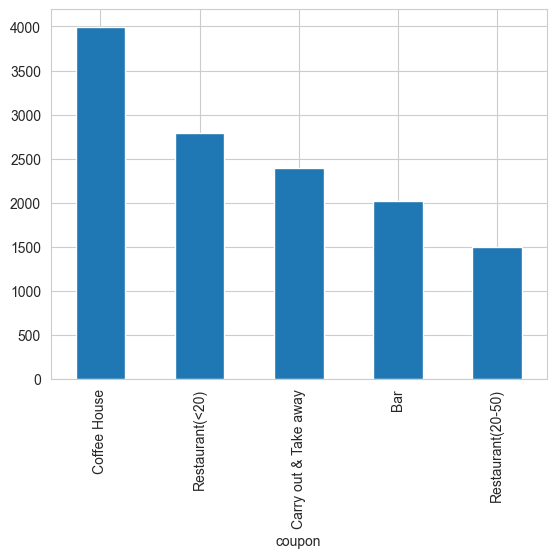

In [192]:
coupon_counts = data["coupon"].value_counts()
coupon_counts.plot(kind="bar")
plt.show()


6. Use a histogram to visualize the temperature column.

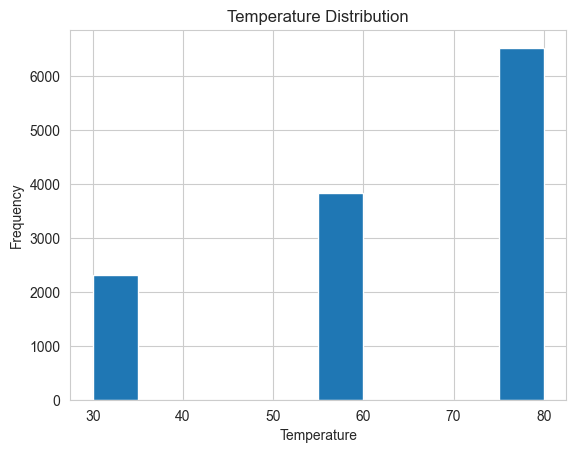

In [193]:
data['temperature'].plot(kind='hist', bins=10)

plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

In [194]:
# Group the data by coupon acceptance
df = data
grouped = df.groupby('Y')
print(grouped)

***We are now going to explore the relationship between customer who accepted coupon versus who did no by grouping on the Y column and then drawing a bar chart for each attribute/column which can impact it***

In [195]:
print(df.columns[0:-1])

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')


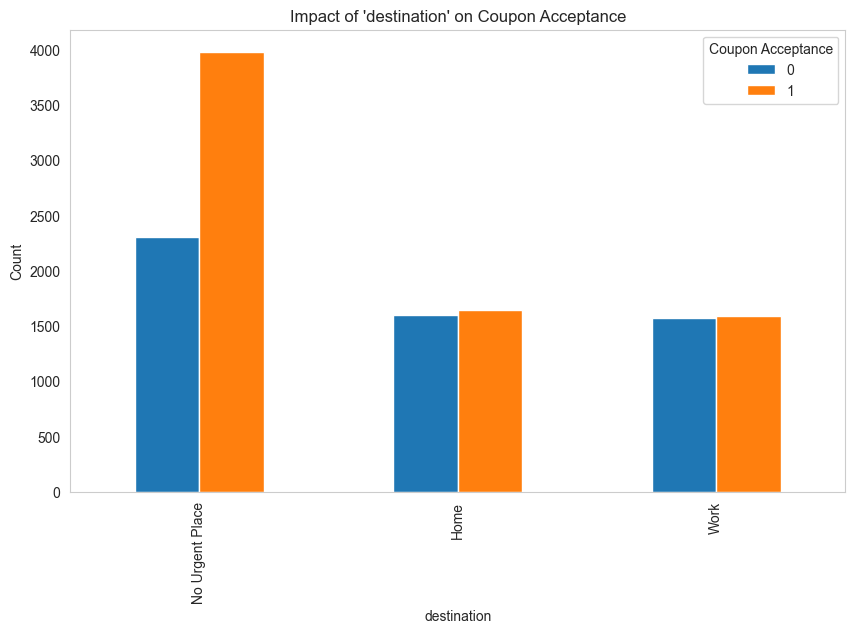

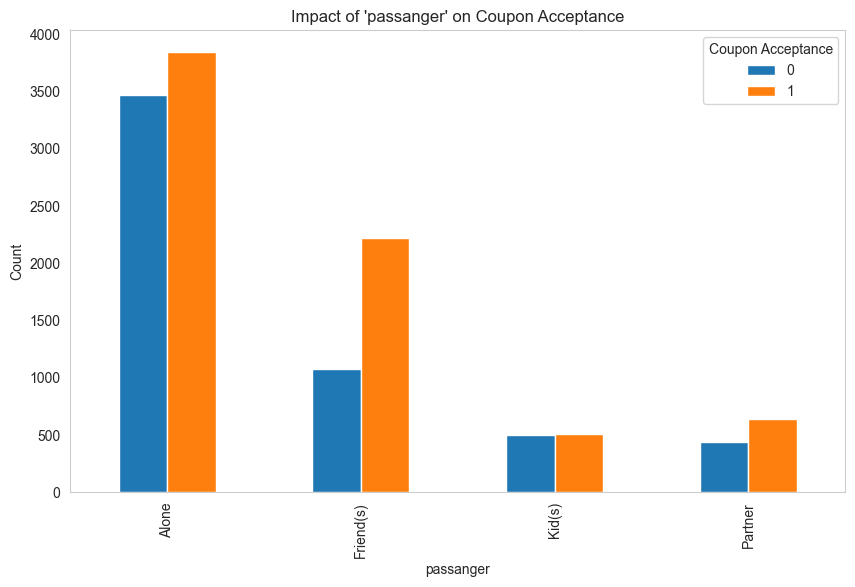

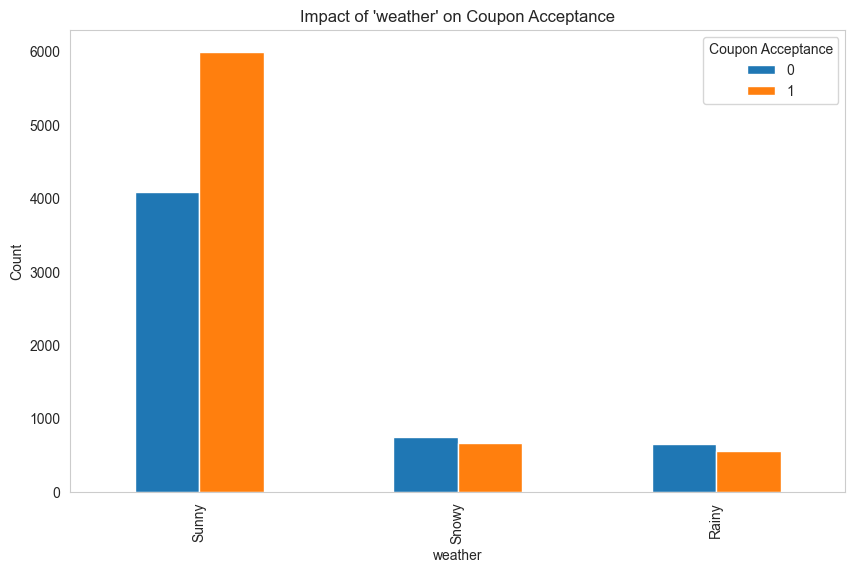

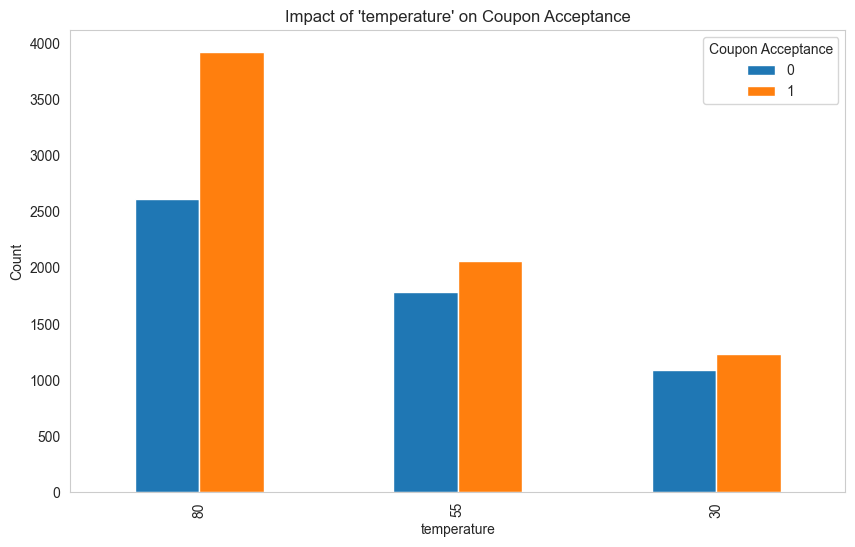

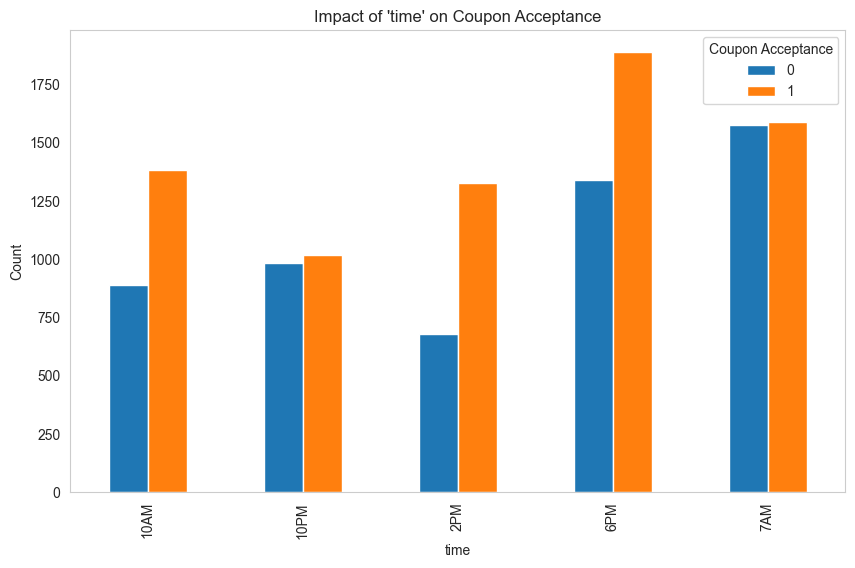

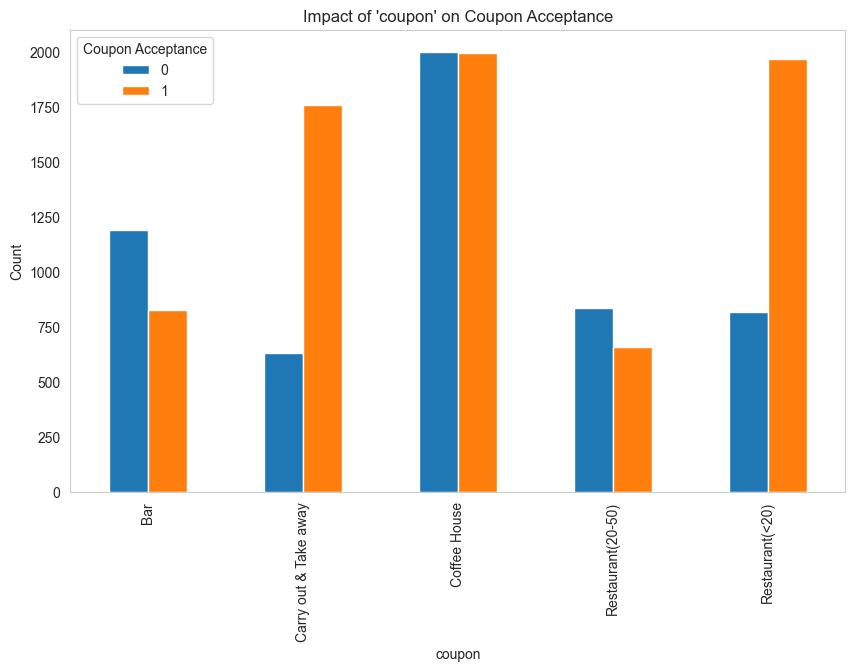

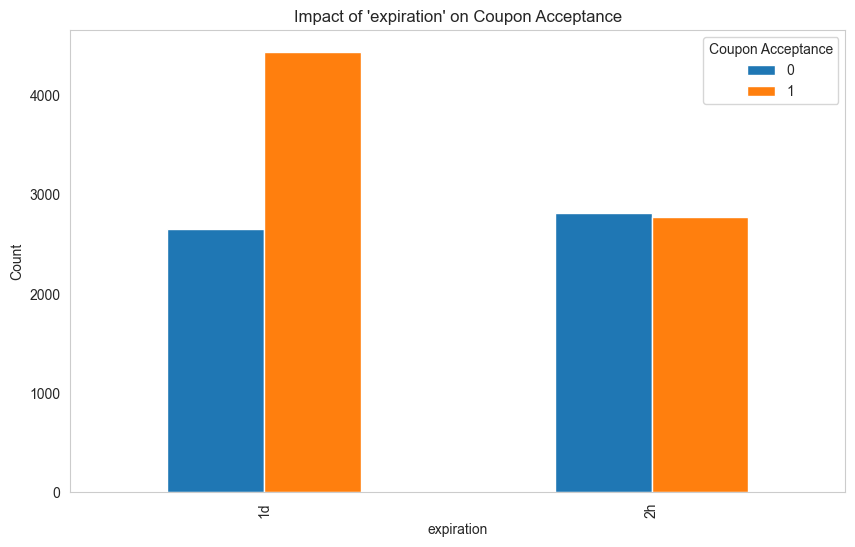

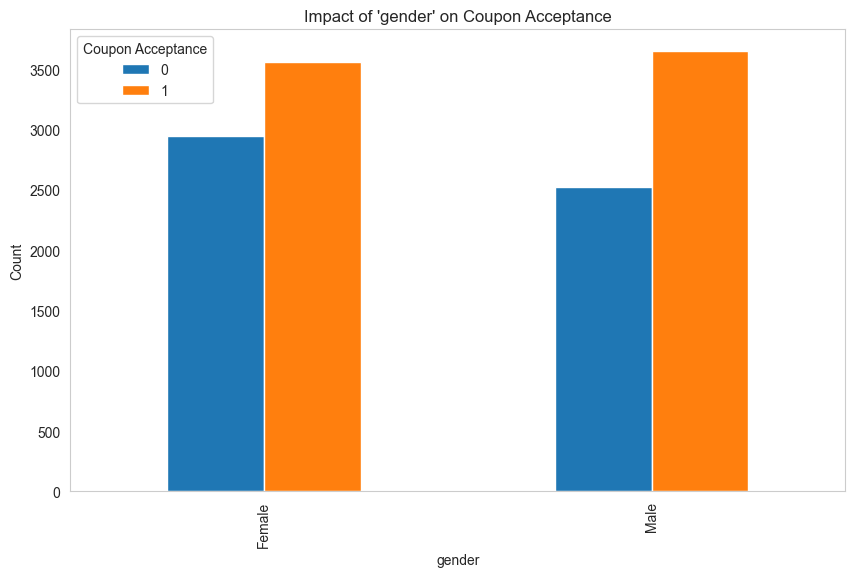

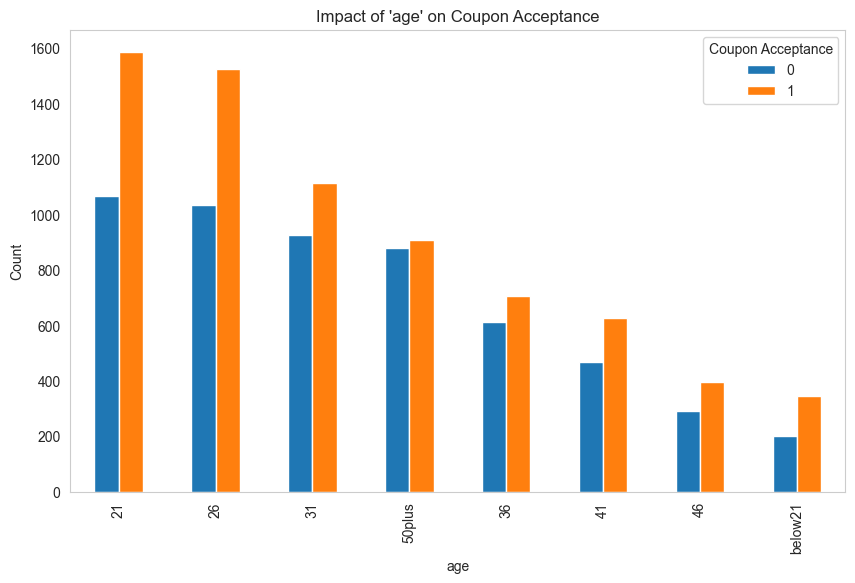

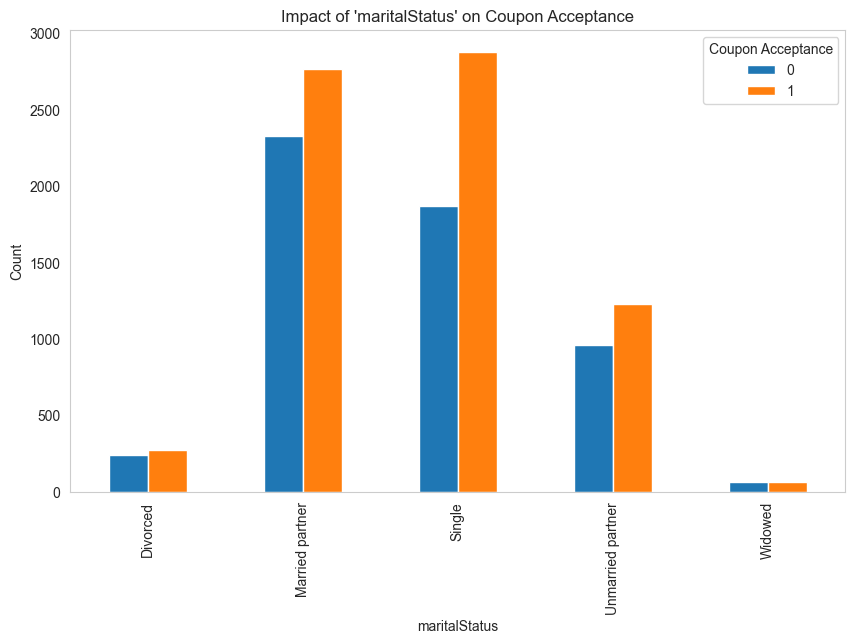

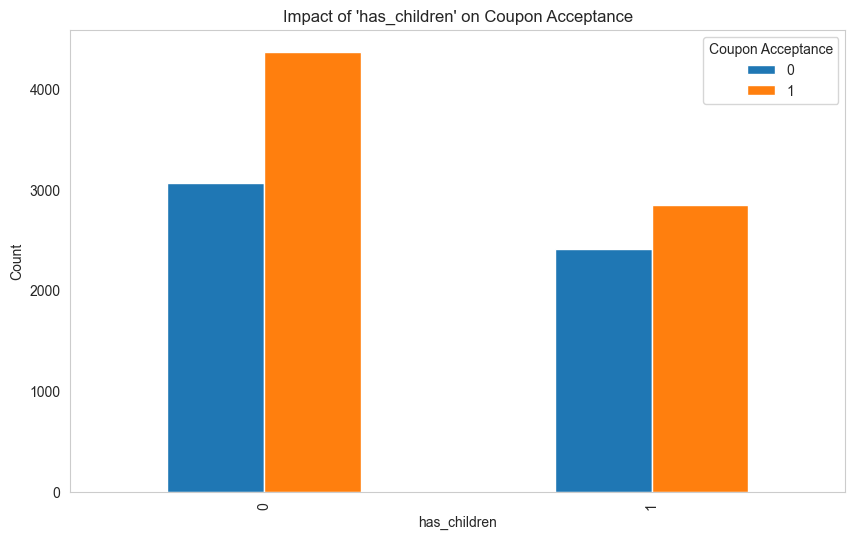

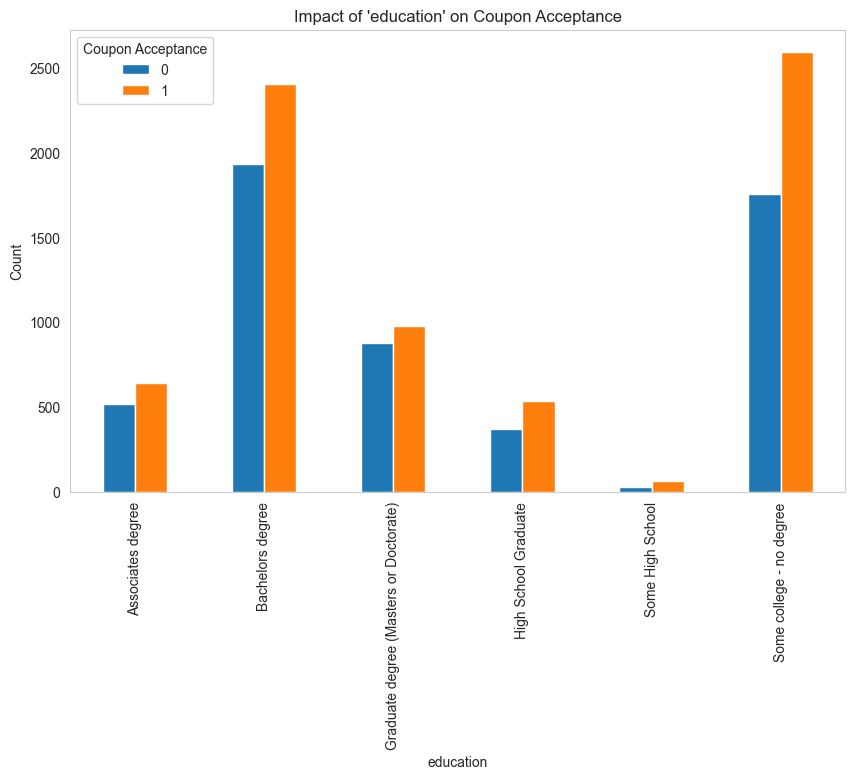

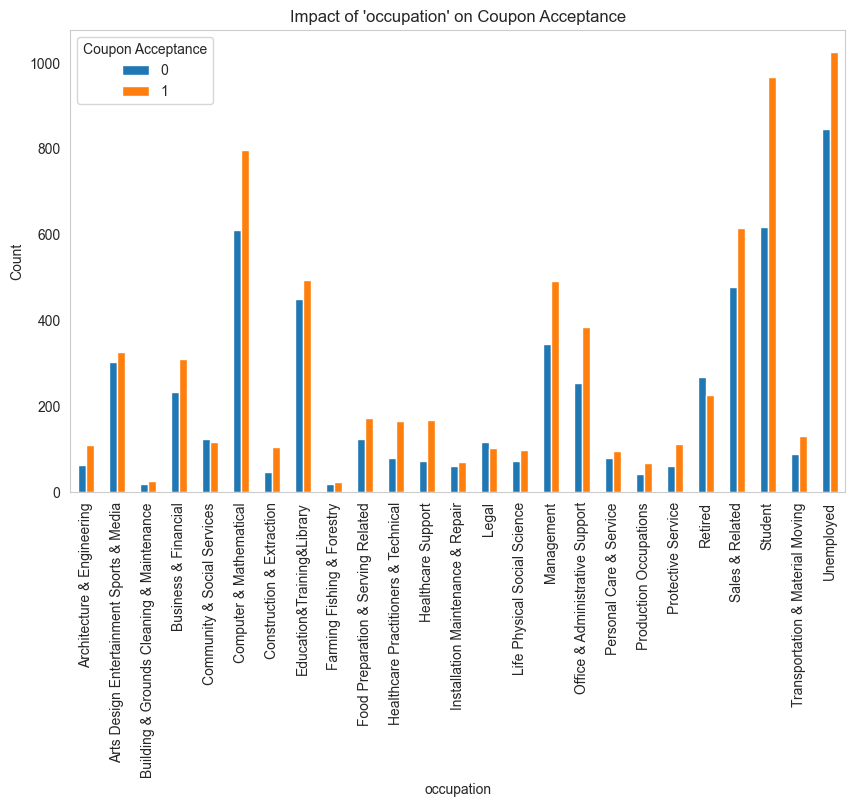

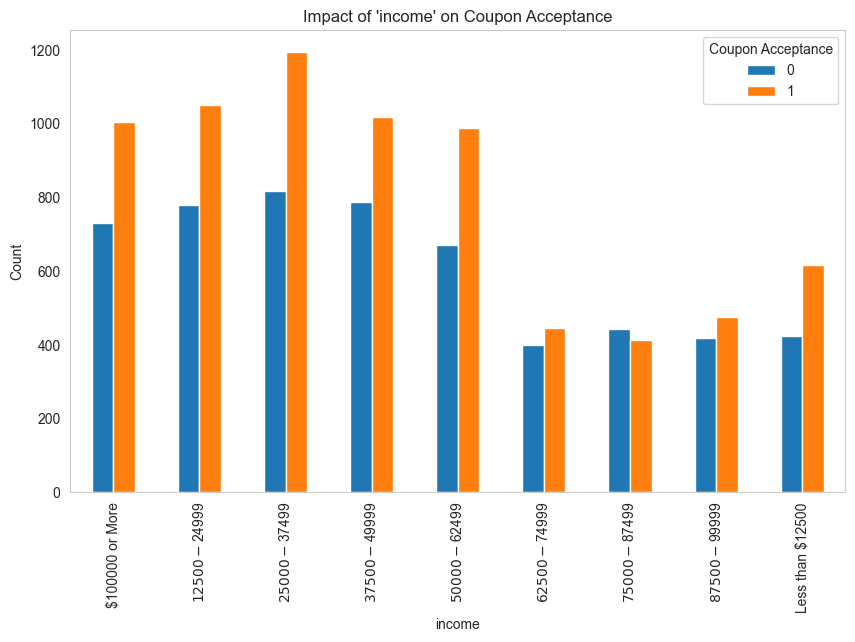

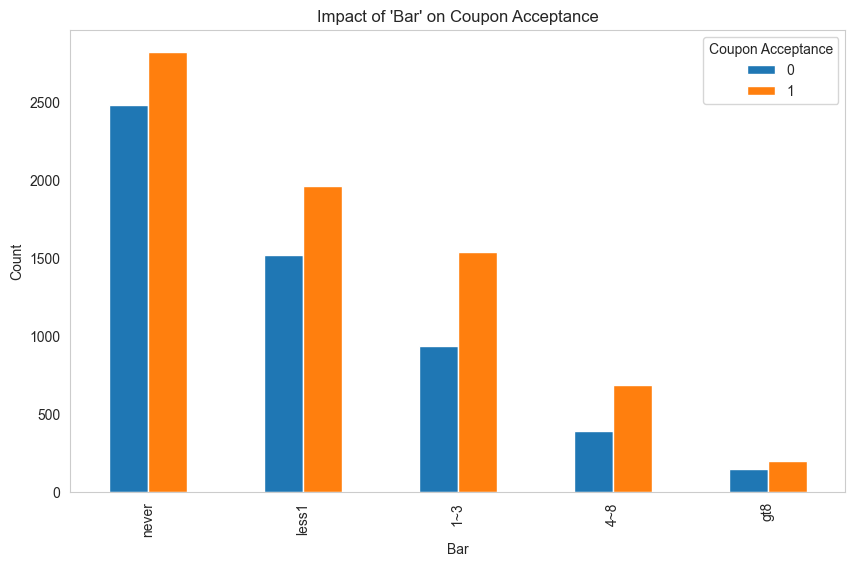

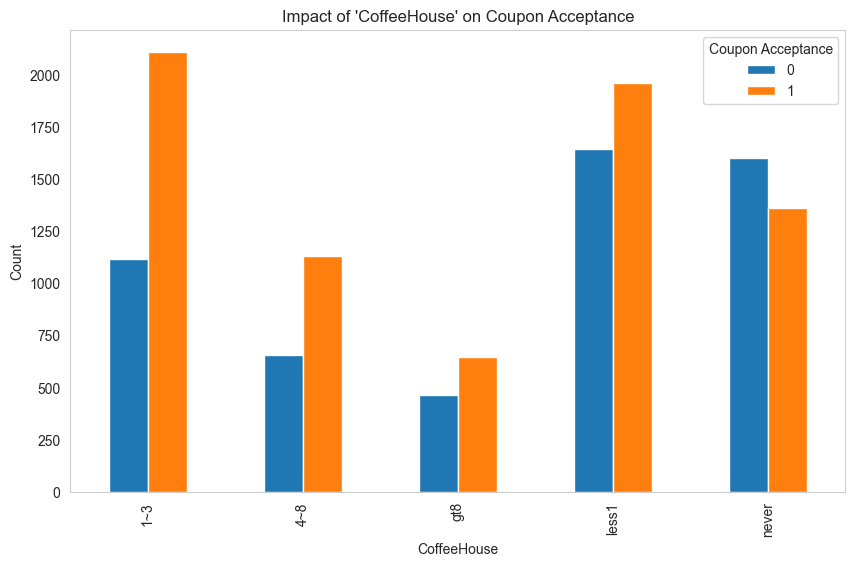

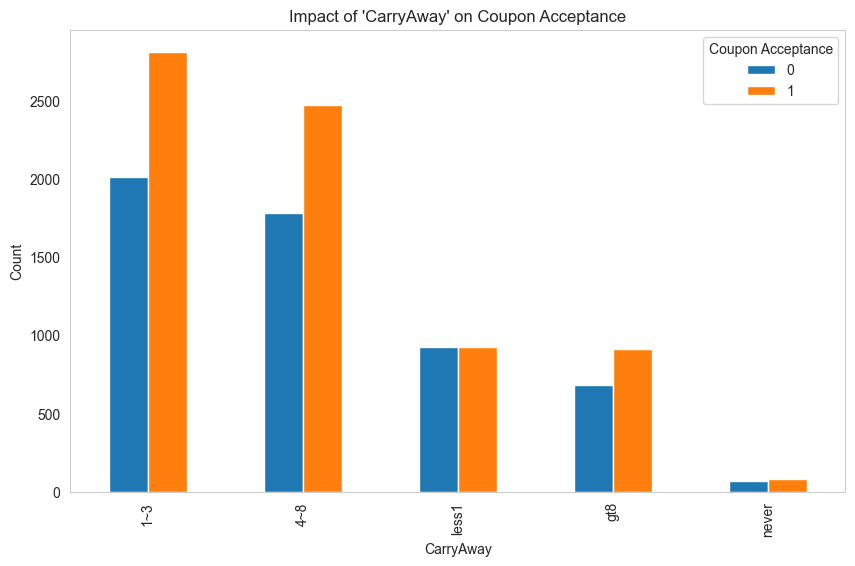

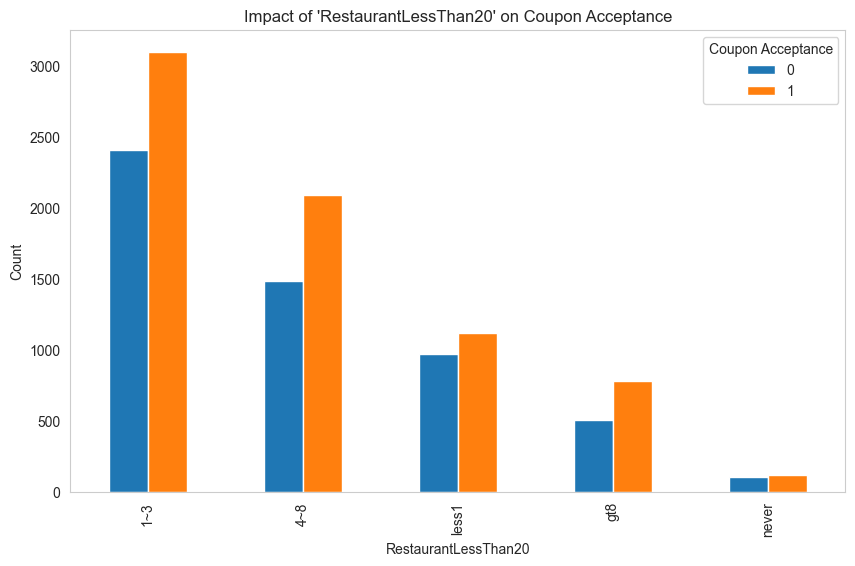

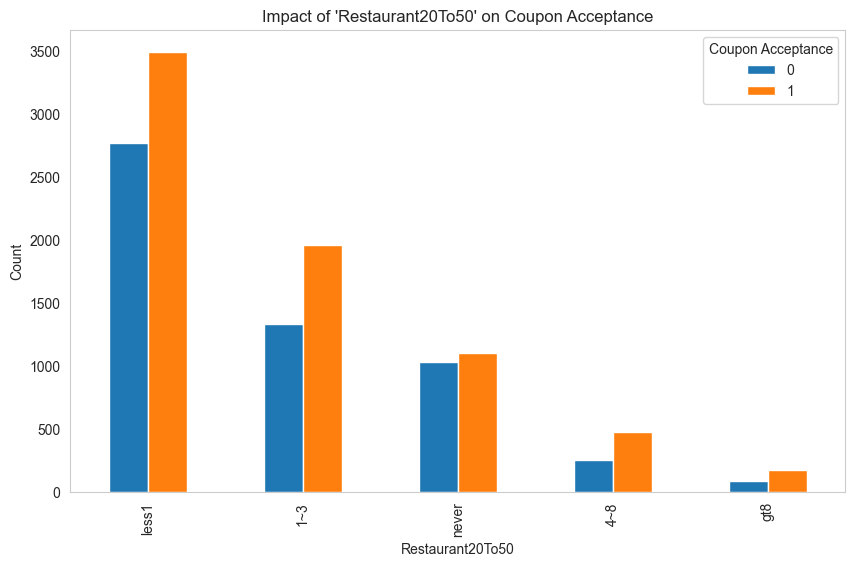

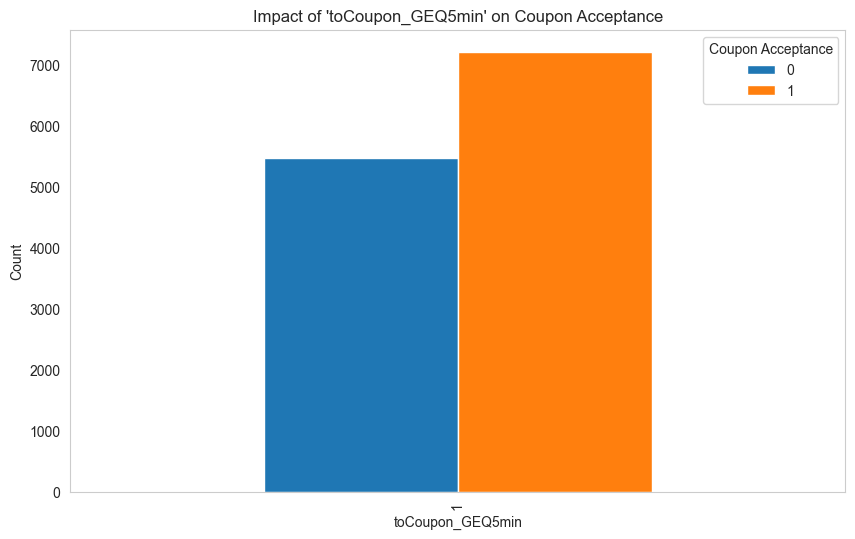

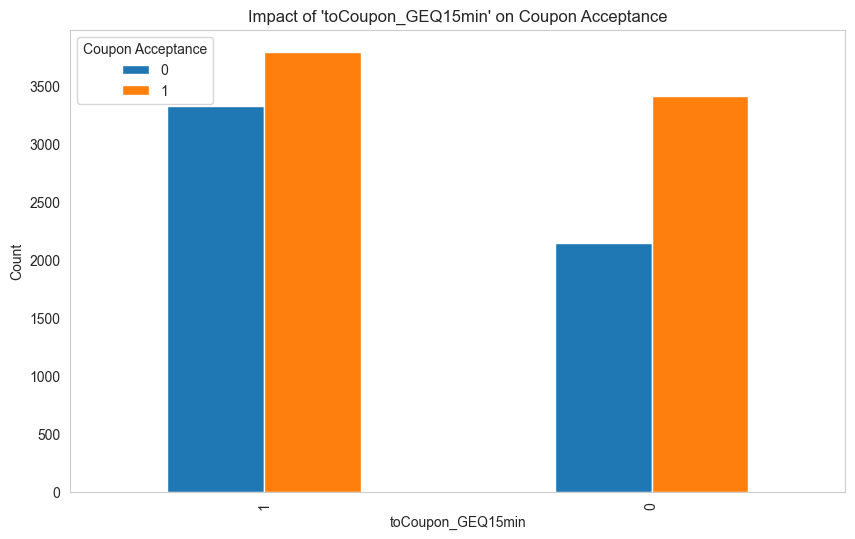

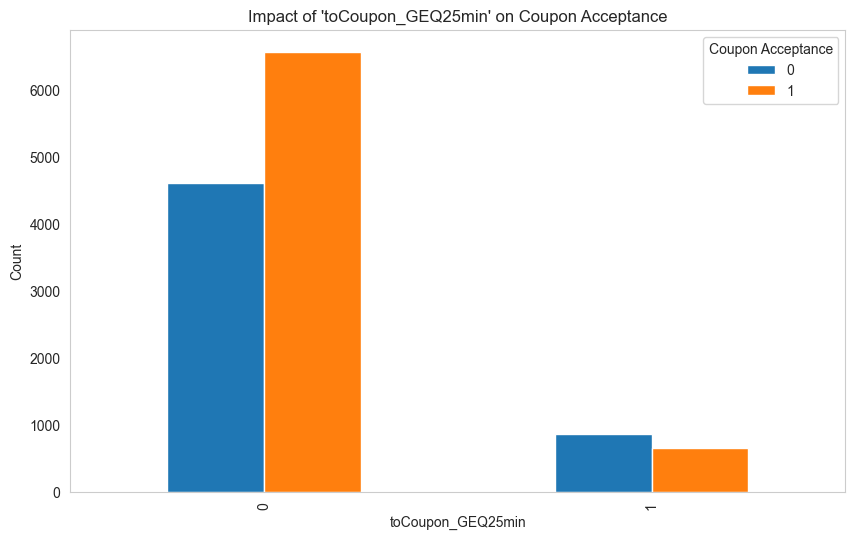

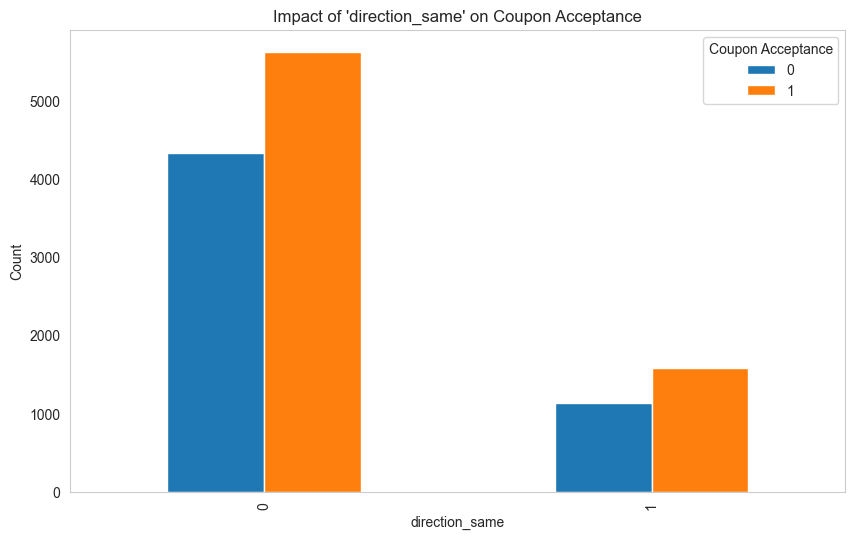

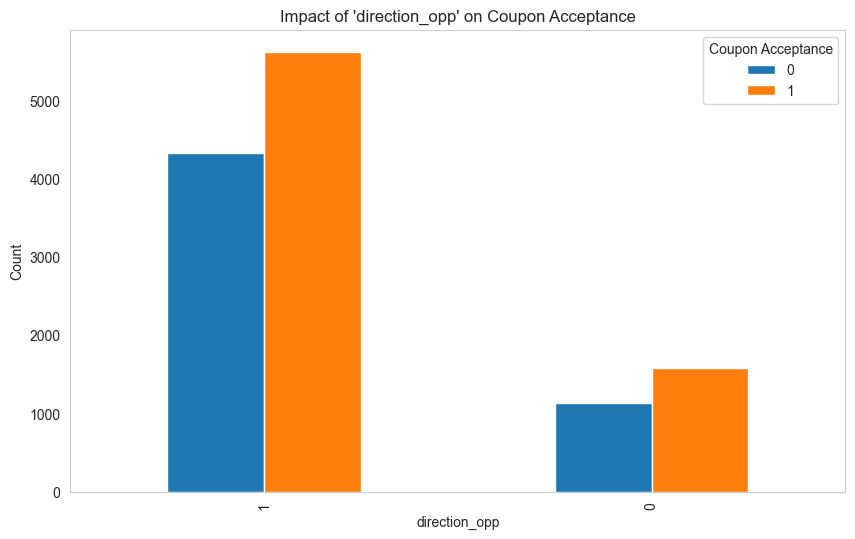

In [196]:
for col in df.columns[0:-1]: 
        bar_data = {category: group[col].value_counts() for category, group in grouped}
        bar_df = pd.DataFrame(bar_data).fillna(0) 
        
        bar_df.plot(kind='bar', figsize=(10, 6))
        plt.title(f"Impact of '{col}' on Coupon Acceptance")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title='Coupon Acceptance')
        plt.xticks(rotation=90)
        plt.grid()
        plt.show()
        

# Data Analysis of Coupon Acceptance Patterns

## Destination - Impacts Coupon Acceptance
- A greater number of people accept coupons when traveling to non-urgent destinations compared to going home or to work.

## Passenger - Impacts Coupon Acceptance
- People traveling with friends are more likely to accept coupons than those traveling with kids, a partner, or traveling alone.

## Weather - Impacts Coupon Acceptance
- Coupons are more likely to be accepted in sunny weather compared to snowy or rainy conditions.

## Temperature - Impacts Coupon Acceptance
- Higher temperatures are associated with increased coupon acceptance.

## Time - Impacts Coupon Acceptance
- Coupons are more frequently accepted at **10 AM**, **2 PM**, and **6 PM**, possibly aligning with breakfast, lunch, and dinner times.

## Coupon Type - Impacts Coupon Acceptance
- Coupons for carryout or takeaway restaurants, or for restaurants costing less than $20, tend to have higher acceptance rates.

## Expiration - Impacts Coupon Acceptance
- Coupons with a **1-day expiry** are generally more acceptable.

## Gender - No Impact on Coupon Acceptance
- Both genders display similar coupon acceptance rates.

## Age - Impacts Coupon Acceptance
- Younger individuals, particularly those under 31, are more likely to accept coupons.

## Marital Status - Impacts Coupon Acceptance
- Single individuals are more likely to accept coupons than those in other marital statuses.

## Children - Impacts Coupon Acceptance
- People without children tend to have a higher coupon acceptance rate.

## Education - Might Impact Coupon Acceptance
- Individuals without a degree seem to have a higher likelihood of accepting coupons.

## Occupation - Mixed Impact
- Students generally have a higher acceptance rate, but the relationship is unclear for other occupations.

## Income - Might Impact Coupon Acceptance
- Individuals earning less than $62,499 or above $100,000 are more likely to accept coupons. The pattern is not entirely clear for intermediate income ranges.

## Bar Visits - No Impact
- Visiting or not visiting bars does not significantly influence coupon acceptance rates.

## Coffee House Visits - Minimal Impact
- While visiting coffee houses does not show a strong influence, individuals who **never visit coffee houses** tend to reject coupons more often.

## Carryout Frequency - Impacts Coupon Acceptance
- People who carry out food fewer than 8 times are more likely to accept coupons.

## Restaurant Visits - No Impact
- The type or frequency of restaurant visits does not have a major impact on coupon acceptance rates.

## Distance to Coupon Restaurant - Impacts Coupon Acceptance
- Restaurants offering coupons within a **25-minute travel distance** see higher acceptance rates.

## Direction - Minimal or No Impact
- Acceptance rates are similar for both "same direction" and "no direction." However, the data is skewed toward "not in the same direction," making it less reliable for comparison.


## Now lets look at the data %ages to ensure the conclusions makes sense

In [197]:
# Iterate over all columns except 'Y'
for col in df.columns[0:-1]:
    acceptance_by_column = data.groupby(col)['Y'].mean() * 100
    
    print(f"\nImpact of {col} on Coupon Acceptance:")
    for value, rate in acceptance_by_column.items():
        print(f"{value}: {rate:.2f}% acceptance rate.")




Impact of destination on Coupon Acceptance:
Home: 50.63% acceptance rate.
No Urgent Place: 63.38% acceptance rate.
Work: 50.22% acceptance rate.

Impact of passanger on Coupon Acceptance:
Alone: 52.58% acceptance rate.
Friend(s): 67.34% acceptance rate.
Kid(s): 50.50% acceptance rate.
Partner: 59.53% acceptance rate.

Impact of weather on Coupon Acceptance:
Rainy: 46.28% acceptance rate.
Snowy: 47.05% acceptance rate.
Sunny: 59.48% acceptance rate.

Impact of temperature on Coupon Acceptance:
30: 53.11% acceptance rate.
55: 53.67% acceptance rate.
80: 60.03% acceptance rate.

Impact of time on Coupon Acceptance:
10AM: 60.84% acceptance rate.
10PM: 50.85% acceptance rate.
2PM: 66.15% acceptance rate.
6PM: 58.45% acceptance rate.
7AM: 50.22% acceptance rate.

Impact of coupon on Coupon Acceptance:
Bar: 41.00% acceptance rate.
Carry out & Take away: 73.55% acceptance rate.
Coffee House: 49.92% acceptance rate.
Restaurant(20-50): 44.10% acceptance rate.
Restaurant(<20): 70.71% acceptance 

## Now lets try checking the correlation between some of the numeric columns and Acceptance rate

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [199]:
col1 = "Y"
col2 = "temperature"
correlation = df[col1].corr(df[col2])

print(f"The correlation between {col1} and {col2} is: {correlation:.2f}")

if correlation == 0:
    print("There is no correlation.")
elif 0 < abs(correlation) <= 0.3:
    print("The correlation is weak.")
elif 0.3 < abs(correlation) <= 0.7:
    print("The correlation is moderate.")
elif 0.7 < abs(correlation) <= 1.0:
    print("The correlation is strong.")

The correlation between Y and temperature is: 0.06
The correlation is weak.


# Summary and Conclusion

Customers who are most likely to accept coupons are young (under 31), single individuals without children, traveling to non-urgent destinations with friends, during sunny weather and higher temperatures (above 70°F). They tend to prefer coupons for carryout, takeaway, or affordable restaurants (under 20 dollar) and are more responsive to coupons with a 1-day expiration. Acceptance rates are also higher during meal-related times such as 10 AM, 2 PM, and 6 PM. Income levels show higher acceptance among those earning less than $62,499 or over $100,000, while gender and bar visits do not significantly impact acceptance.
